# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

# Encoding

In [ ]:
data_encoded = data.drop(columns=['id']) # Dropped 'id' column

In [ ]:
duplicates = data_encoded.duplicated().sum()
data_encoded = data_encoded.drop_duplicates() # Dropped duplicates
print(duplicates)

0


In [7]:
missing_values = data_encoded.isnull().sum()
missing_percent = (missing_values / len(data_encoded)) * 100

missing_df = pd.DataFrame({'Missing values:': missing_values, 'Missing percent:': missing_percent})

print(missing_df)

                   Missing values:  Missing percent:
gender                           0          0.000000
age                              0          0.000000
hypertension                     0          0.000000
heart_disease                    0          0.000000
ever_married                     0          0.000000
work_type                        0          0.000000
Residence_type                   0          0.000000
avg_glucose_level                0          0.000000
bmi                            201          3.933464
smoking_status                   0          0.000000
stroke                           0          0.000000


In [ ]:
data_encoded = data_encoded.dropna(subset=['bmi']) # Dropped rows with null values

In [ ]:
data_a = pd.get_dummies(data_encoded[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
data_b = data_encoded.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

data_encoded = pd.concat([data_a, data_b], axis = 1) # Merging datasets

# Plots

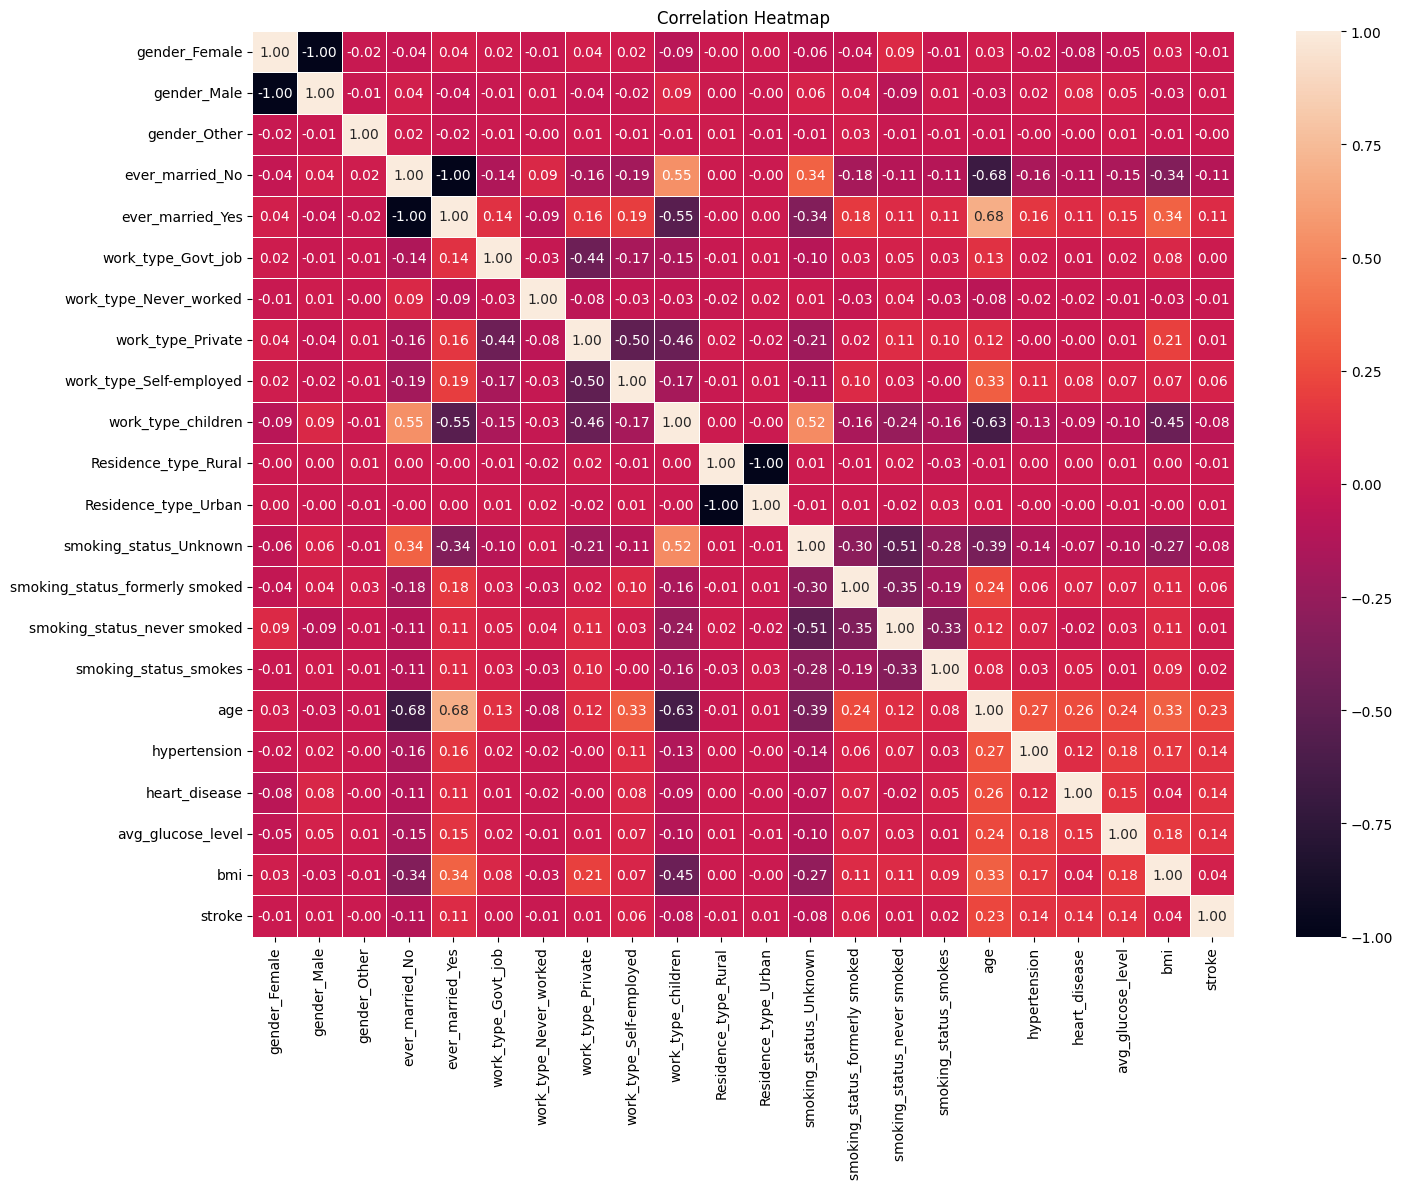

In [10]:
corr = data_encoded.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Dropped gender, residence_type, work_type, smoking_status, bmi due to weak correlation

In [11]:
data_encoded = data_encoded.drop(columns=['gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'bmi'])

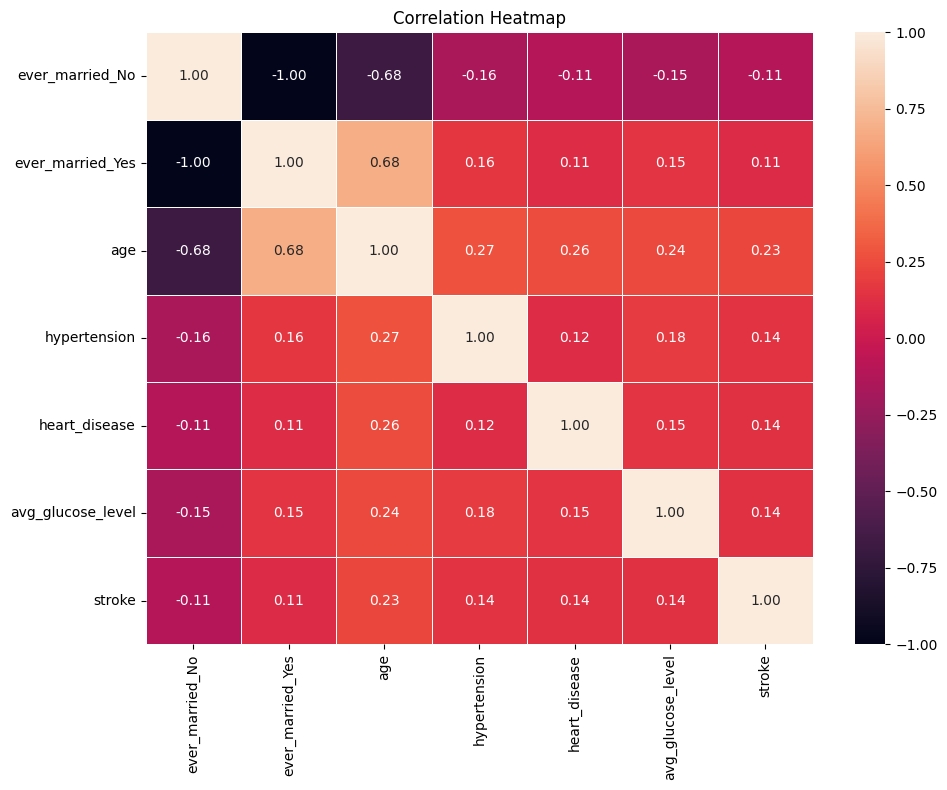

In [12]:
corr = data_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
data_encoded = data_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]

# Models

In [17]:
x = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print("Logistic regression accuracy: ", accuracy_score(y_test, y_pred_log))

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print('Decision tree accuracy: ', accuracy_score(y_test, y_pred_tree))

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred_rf))

Logistic regression accuracy:  0.9460285132382892
Decision tree accuracy:  0.9103869653767821
Random Forest accuracy:  0.9348268839103869


In [18]:
age = int(input('Age: '))
hypertension = int(input('Hypertention (Yes = 1, No = 0): '))
heart_disease = int(input('Heart Disease (Yes = 1, No = 0): '))
avg_glucose_level = int(input('Average Glucose Level: '))

user_input = [age, hypertension, heart_disease, avg_glucose_level]
user_input = np.array(user_input).reshape(1, -1)

proba = log_reg.predict_proba(user_input)[0][1]

print(f'Predicted Stroke Risk: {proba * 100:.2f}%')

Predicted Stroke Risk: 0.85%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
